In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# !pip install nlpaug
# import nltk
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
# import nlpaug
# import nlpaug.augmenter.word as naw
# aug = naw.SynonymAug(aug_src='wordnet',aug_max=2)
# aug.augment("Misleading reviews. Worst coffee ever had, and sorely disappointing vibe.",n=2)

In [3]:
!pip install sentencepiece 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 29.5 MB/s 


In [4]:
!pip install transformers=='4.2.0' 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 14.2 MB/s 
     |████████████████████████████████| 880 kB 8.1 MB/s 
     |████████████████████████████████| 2.9 MB 11.4 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=682d5db41552db2691a9b1e7dd54f623e0e20eae4bb721631f9e5a703919c751
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses


In [5]:
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling

In [6]:
import pandas as pd
train=pd.read_csv('/content/drive/MyDrive/IIIT-L_Research_Project/final_dataset.tsv', sep='\t', encoding='utf-8')

In [7]:
# train=train.astype({"text": str})

In [8]:
# train=train.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
# train

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
train['preprocessed_tweet'] = train['preprocessed_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
train["preprocessed_tweet"] = train['preprocessed_tweet'].str.replace('[^\w\s]','')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


In [10]:
# train=train.iloc[:,1:]
train.head()

,tweet_id,preprocessed_tweet,label
0,104700,pfizer believes need booster shot need knows p...,1
1,102330,covid19 vaccine country mess government ia sha...,1
2,103848,nihs fauci proceeding need deploy vaccine take...,1
3,108270,nightmareholic eretserus elonmusk human herd i...,1
4,104210,still unclear covid19 vaccine would approved u...,1


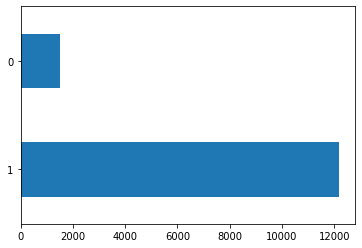

In [11]:
train['label'].value_counts().plot(kind="barh")

In [12]:
train.isnull().sum().sum()

0

In [13]:
train = train.sample(frac = 1)

In [14]:
# '''new_train=train.iloc[:7000,:]
# test=train.iloc[7000:,:]
# train=new_train'''

In [15]:
# new_zero = pd.DataFrame(aug_text,columns=['text'])
# new_zero['status']=status_zero

In [16]:
# import nlpaug.augmenter.word as naw
# aug = naw.SynonymAug(aug_src='wordnet',aug_max=5)
# aug_text=[]
# status_zero=[]
# for i in x:
#   a=aug.augment(i,n=4)
#   for j in a:
#     aug_text.append(j)
#     status_zero.append(0)
#   aug_text.append(i)
#   status_zero.append(0)


In [17]:
import transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification,AutoModel
  
# tokenizer = AutoTokenizer.from_pretrained("nghuyong/ernie-2.0-en")

# model = AutoModelForSequenceClassification.from_pretrained("nghuyong/ernie-2.0-en",output_hidden_states=True,num_labels=7)

tokenizer = transformers.AutoTokenizer.from_pretrained('roberta-large-mnli')


model = AutoModelForSequenceClassification.from_pretrained('roberta-large-mnli')

Downloading:   0%|          | 0.00/688 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.43G [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [18]:
train.label.unique()

array([1, 0])

In [19]:
# labels={'Non_hope_speech': 0,
#  'Hope_speech': 1,}
# # train['uid']= train['uid'].map(labels)
# # labels={'OAG':    0,
# #  'CAG': 1,
# #  'NAG': 2}
# # labels={'GEN': 0,
# # #  'NGEN': 1}
# # labels={'0': 0,
# #  '1': 1}
# train['category']= train['category'].map(labels)


In [20]:
len(train.label.unique())


2

In [21]:
sentences = train.preprocessed_tweet.values
labels = train.label.values
print(len(sentences), len(labels))

13692 13692


In [22]:
# token_counts = []
# for _, row in train.iterrows():
#   token_count = len(tokenizer.encode(
#     row["preprocessed_tweet"],
#     max_length=200,
#     truncation=True
#   ))
#   token_counts.append(token_count)
# sns.histplot(token_counts)
# plt.xlim([0, 200])

In [23]:
import tqdm as tqdm
import torch

In [24]:
res = max(train['preprocessed_tweet'], key = len)
len(res)
res = sum(map(len, train['preprocessed_tweet']))/float(len(train['preprocessed_tweet']))
c=0
for i in train['preprocessed_tweet']:
    if len(i)<100:
        c=c+1
c

3010

In [25]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in tqdm.tqdm(sentences):
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length =200 ,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation=True
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

  0%|          | 0/13692 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2137: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
100%|██████████| 13692/13692 [00:02<00:00, 4864.53it/s]


Original:  yall dumb thinking theyre really getting vaccine theyre getting b12 shots know yall gullible af
Token IDs: tensor([    0,   219,  1250, 16881,  2053,    51,   241,   269,   562,  9937,
           51,   241,   562,   741,  1092,  2347,   216,  1423,  1250, 37957,
         4748,  9724,     2,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,   

In [26]:
labels.unique()

tensor([0, 1])

In [27]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation "split.

# Calculate the number of samples to include in each set.
train_size = int(len(dataset))
# val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
# train_dataset = random_split(dataset, [train_size])
print('{:>5,} training samples'.format(train_size))
# print('{:>5,} validation samples'.format(val_size))

13,692 training samples


In [28]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 8
# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            dataset,  # The training samples.
            # sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

In [29]:
from transformers import AdamW
optimizer = AdamW(model.parameters(),
                  lr = 1e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [30]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 5
# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [31]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [32]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [33]:
import datetime
torch.cuda.empty_cache()

In [34]:
model.cuda()

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
         

In [35]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = '/content/drive/MyDrive/Final_Predictions'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

Saving model to /content/drive/MyDrive/Final_Predictions


In [36]:
import random
import numpy as np
import time 
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0
    total_eval_accuracy=0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 1000 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = time.time() - t0
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        outputs = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)
         # The call to `model` always returns a tuple, so we need to pull the
        # loss value out of the tuple.
        loss = outputs[0]
            # Move logits and labels to CPU
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    avg_train_accuracy = total_eval_accuracy / len(train_dataloader)
    print(avg_train_loss)
    print(avg_train_accuracy)
    # Measure how long this epoch took.
    training_time = time.time() - t0

    print("")
    # print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
    model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
    model_to_save.save_pretrained(output_dir)
    tokenizer.save_pretrained(output_dir)

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    # print("")
    # print("Running Validation...")

    # t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    # model.eval()

    # # Tracking variables 
    # total_eval_accuracy = 0
    # total_eval_loss = 0
    # nb_eval_steps = 0

    # Evaluate data for one epoch
    # for batch in validation_dataloader:
        
    #     # Unpack this training batch from our dataloader. 
    #     #
    #     # As we unpack the batch, we'll also copy each tensor to the GPU using 
    #     # the `to` method.
    #     #
    #     # `batch` contains three pytorch tensors:
    #     #   [0]: input ids 
    #     #   [1]: attention masks
    #     #   [2]: labels 
    #     b_input_ids = batch[0].to(device)
    #     b_input_mask = batch[1].to(device)
    #     b_labels = batch[2].to(device)
        
    #     # Tell pytorch not to bother with constructing the compute graph during
    #     # the forward pass, since this is only needed for backprop (training).
    #     with torch.no_grad():        

    #         # Forward pass, calculate logit predictions.
    #         # token_type_ids is the same as the "segment ids", which 
    #         # differentiates sentence 1 and 2 in 2-sentence tasks.
    #         # The documentation for this `model` function is here: 
    #         # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
    #         # Get the "logits" output by the model. The "logits" are the output
    #         # values prior to applying an activation function like the softmax.
    #         (loss, logits) = model(b_input_ids, 
    #                                token_type_ids=None, 
    #                                attention_mask=b_input_mask,
    #                                labels=b_labels)
            
    #     # Accumulate the validation loss.
    #     # total_eval_loss += loss.item()

    #     # Move logits and labels to CPU
    #     logits = logits.detach().cpu().numpy()
    #     label_ids = b_labels.to('cpu').numpy()

    #     # Calculate the accuracy for this batch of test sentences, and
    #     # accumulate it over all batches.
    #     total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # # Report the final accuracy for this validation run.
    # avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    # print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # # Calculate the average loss over all of the batches.
    # avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # # Measure how long the validation run took.
    # validation_time = format_time(time.time() - t0)
    
    # print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    # print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            # 'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_train_accuracy,
            # 'Training Time': training_time,
            # 'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

# print("Total training took {:} (h:mm:ss)".format(time.time()-total_t0))


======== Epoch 1 / 5 ========
Training...
  Batch 1,000  of  1,712.    Elapsed: 982.6531322002411.
0.2556232641013551
0.9263288551401869

  Training epcoh took: 1681.5484714508057

======== Epoch 2 / 5 ========
Training...
  Batch 1,000  of  1,712.    Elapsed: 982.8988108634949.
0.18811250349198902
0.9499123831775701

  Training epcoh took: 1681.8630759716034

======== Epoch 3 / 5 ========
Training...
  Batch 1,000  of  1,712.    Elapsed: 982.7366149425507.
0.14216314186835907
0.967508761682243

  Training epcoh took: 1682.008941411972

======== Epoch 4 / 5 ========
Training...
  Batch 1,000  of  1,712.    Elapsed: 983.2437386512756.
0.0945102712002213
0.9808703271028038

  Training epcoh took: 1683.096445798874

======== Epoch 5 / 5 ========
Training...
  Batch 1,000  of  1,712.    Elapsed: 983.0165348052979.
0.0631252212074117
0.9881717289719626

  Training epcoh took: 1682.564543247223

Training complete!


In [37]:
test=pd.read_csv('/content/drive/MyDrive/IIIT-L_Research_Project/test_set.tsv', sep='\t', encoding='utf-8')

In [38]:
# test.columns=['text']
test.head()

,tweet_id,preprocessed_tweet
0,111083,tamifairchild1 kingmoyer therightmelissa realc...
1,110702,deepbiden the govt system has created coronath...
2,110204,the canadian hc mckinnondavid blocked me for p...
3,109871,i’m a consultant in icu and we have lots of co...
4,108890,comparing the covid19 vaccine with the smallpo...


In [39]:
# test=test.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))
# test

In [40]:
# labels={'Non_hope_speech': 0,
#  'Hope_speech': 1,}
# # train['uid']= train['uid'].map(labels)
# # labels={'OAG':    0,
# #  'CAG': 1,
# #  'NAG': 2}
# # labels={'GEN': 0,
# # #  'NGEN': 1}
# # labels={'0': 0,
# #  '1': 1}
# test['category']= test['category'].map(labels)


In [41]:
# test=test.rename(columns = {'text                    ':'text'})

In [42]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
test['preprocessed_tweet'] = test['preprocessed_tweet'].apply(lambda y: ' '.join([word for word in y.split() if word not in (stop_words)]))
test["preprocessed_tweet"] = test['preprocessed_tweet'].str.replace('[^\w\s]','')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


In [43]:
# test=test.iloc[:,1:]

In [44]:
# test=test.rename(columns = {'text_d':'text'})

In [45]:
test

,tweet_id,preprocessed_tweet
0,111083,tamifairchild1 kingmoyer therightmelissa realc...
1,110702,deepbiden govt system created coronathey want ...
2,110204,canadian hc mckinnondavid blocked pointing can...
3,109871,im consultant icu lots covid19 patients great ...
4,108890,comparing covid19 vaccine smallpox vaccine lik...
...,...,...
5917,110109,jampj need repeat every day vaccines going sav...
5918,112348,anyone doubt effective covid19 vaccines could ...
5919,109363,good explanation conspiracy az vaccine loved y...
5920,201848,yesterday received first dose pfizer covid19 v...


In [46]:
# labels={'Non-anti-LGBT+ content': 0,
#  'Homophobic': 1,
#  'Transphobic': 2}
# # train['uid']= train['uid'].map(labels)
# # labels={'OAG':    0,
# #  'CAG': 1,
# #  'NAG': 2}
# # labels={'GEN': 0,
# # #  'NGEN': 1}
# # labels={'0': 0,
# #  '1': 1}
# test['category']= test['category'].map(labels)


In [47]:
# test=pd.read_csv('/content/test_master_multi.csv')
# test.dropna(inplace=True)
sentences2 = test.preprocessed_tweet.values

input_ids = []
attention_masks = []

for sent in tqdm.tqdm(sentences2):
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 200,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)

  0%|          | 0/5922 [00:00<?, ?it/s]Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2137: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
100%|██████████| 5922/5922 [00:01<00:00, 3260.77it/s]


In [48]:
batch_size = 64

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

In [49]:
# test["text"]= test["text"].astype(str)

In [50]:
model.eval()

# Tracking variables 
predictions= []

# Predict 
for batch in tqdm.tqdm(prediction_dataloader):
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  
  # Store predictions and true labels
  predictions.append(logits)

print('    DONE.')

100%|██████████| 93/93 [03:37<00:00,  2.34s/it]

    DONE.


In [51]:
from numpy import exp
def softmax(vector):
	e = exp(vector)
	return e / e.sum()

In [52]:
res=[]
for val in predictions:
  for m in val:
    temp=softmax(m)
    # print(temp)
    u=np.argmax(temp)
    res.append(u)

In [53]:
r=pd.DataFrame(res)

In [54]:
test['Labels']=res

In [55]:
# labels={0: 'Non_hope_speech',
#  1: 'Hope_speech',}
# # train['uid']= train['uid'].map(labels)
# # labels={'OAG':    0,
# #  'CAG': 1,
# #  'NAG': 2}
# # labels={'GEN': 0,
# # #  'NGEN': 1}
# # labels={'0': 0,
# #  '1': 1}
# test['Labels']= test['Labels'].map(labels)

In [56]:
test.to_csv('/content/drive/MyDrive/Final_Predictions/roberta-large_predictions.tsv', sep='\t', index=False)

In [57]:
# from sklearn.metrics import classification_report
# classification_report(test.category, r[0])

In [58]:
from sklearn.metrics import classification_report
print(classification_report(test.label,r[0],digits=4))

AttributeError: ignored

In [ ]:
# from sklearn.metrics import roc_auc_score
# roc_auc_score(test.Label,r[0])